# scipy.signal.find_peaks

- 시계열 데이터에서 변수를 추출하는 방법을 고민하고 있던 차에 알게 된 함수이다.
- 그래프에서 극값을 추출해준다.

## Parameters
>- x : A signal with peaks.
>- height : 주변 포인트와의 높이 차이 상/하한.
  - 예를 들어, height=[1,2]라면, 주변 포인트와의 y값 차이가 1~2사이여야 peak을 계산
>- distance : peak 간의 최소 거리. 
>  - 예를 들어, distance=5이면 주변 peak과의 거리가 5 포인트 이상 떨어져야 새로운 peak을 계산한다. 
>-  prominence : peak과 주변 골짜기와의 높이 차이 상/하한.
>- width: peak의 너비. 
>- plateau_size : Required size of the flat top of peaks in samples
>
> - wlen, rel_height : 더 살펴봐야 함

## Returns
- peaks(ndarray) : indices of peaks 
- properties(dict) : parameter를 정의했을 때만 그와 관련된 값이 계산됨. parameter 정의 안 했으면 빈 사전이 나옴

**Example 1**

[scipy link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

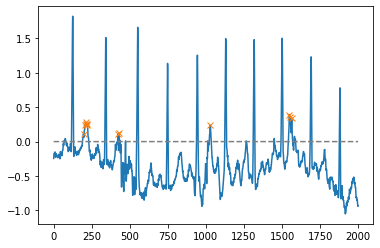

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import electrocardiogram
from scipy.signal import find_peaks

x = electrocardiogram()[0000:2000] # 심전도 데이터
peaks, _ = find_peaks(x, height=[0.1,0.5])
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.show()

**Example2**

[Kaggle VSB 1th solution link](https://www.kaggle.com/mark4h/vsb-1st-place-solution#Preprocessing-Overview)

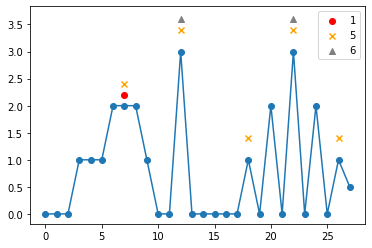

In [0]:
a = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 1, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 0, 1, 0.5])

p1 = find_peaks(a, distance=1, plateau_size=2) # 2칸 이상 평평한 peak만 고른다.
p3, _ = find_peaks(a, distance=3)
p4, _ = find_peaks(a, distance=6)

plt.plot(a, marker='o')
plt.scatter(p1[0], a[p1[0]]+0.2, color='red', label='1')
plt.scatter(p3, a[p3]+0.4, color='orange', marker='x', label='5')
plt.scatter(p4, a[p4]+0.6, color='grey', marker='^', label='6')
plt.legend()
plt.show()

In [77]:
print('indices of peaks: ', p1[0])
print('Properties:',p1[1]) # plateau_sizes는 peak의 평평한 포인트 개수, 나머지는 peak 왼쪽 오른쪽의 index

indices of peaks:  [7]
Properties: {'plateau_sizes': array([3]), 'left_edges': array([6]), 'right_edges': array([8])}


## 관련 함수

- peak_prominence
- peak_widths 
- find_peaks_cwt: Noise와 peak의 구분을 위해, smoothing 기능이 있는 함수

###**find_peaks_cwt**

**Example1**

find_peaks_cwt: [32] [1.6] [0.9995736]
find_peaks: [31] [1.55] [0.99978376]


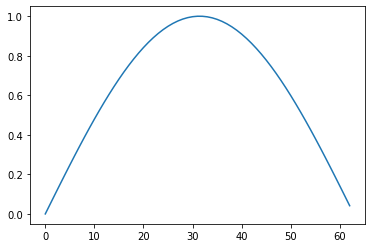

In [98]:
from scipy import signal
xs = np.arange(0, np.pi, 0.05)
data = np.sin(xs)
plt.plot(data)

# find_peaks_cwt
peakind = signal.find_peaks_cwt(data, np.arange(1,10))
print('find_peaks_cwt:',peakind, xs[peakind], data[peakind])

# find_peaks
peakind,_ = signal.find_peaks(data)
print('find_peaks:',peakind, xs[peakind], data[peakind])

**Example2**

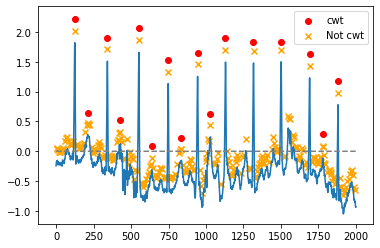

In [120]:
x = electrocardiogram()[0000:2000] # 심전도 데이터
peaks_cwt = signal.find_peaks_cwt(x, np.arange(10,50))
peaks, _ = signal.find_peaks(x)

plt.plot(x)
plt.scatter(peaks_cwt, x[peaks_cwt]+0.4, color='red', label='cwt')
plt.scatter(peaks, x[peaks]+0.2, color='orange', marker='x',label='Not cwt')

plt.plot(np.zeros_like(x), "--", color="gray")
plt.legend()
plt.show()